In [2]:
from __future__ import print_function
import sys
import pandas as pd
import math
import os
import argparse
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

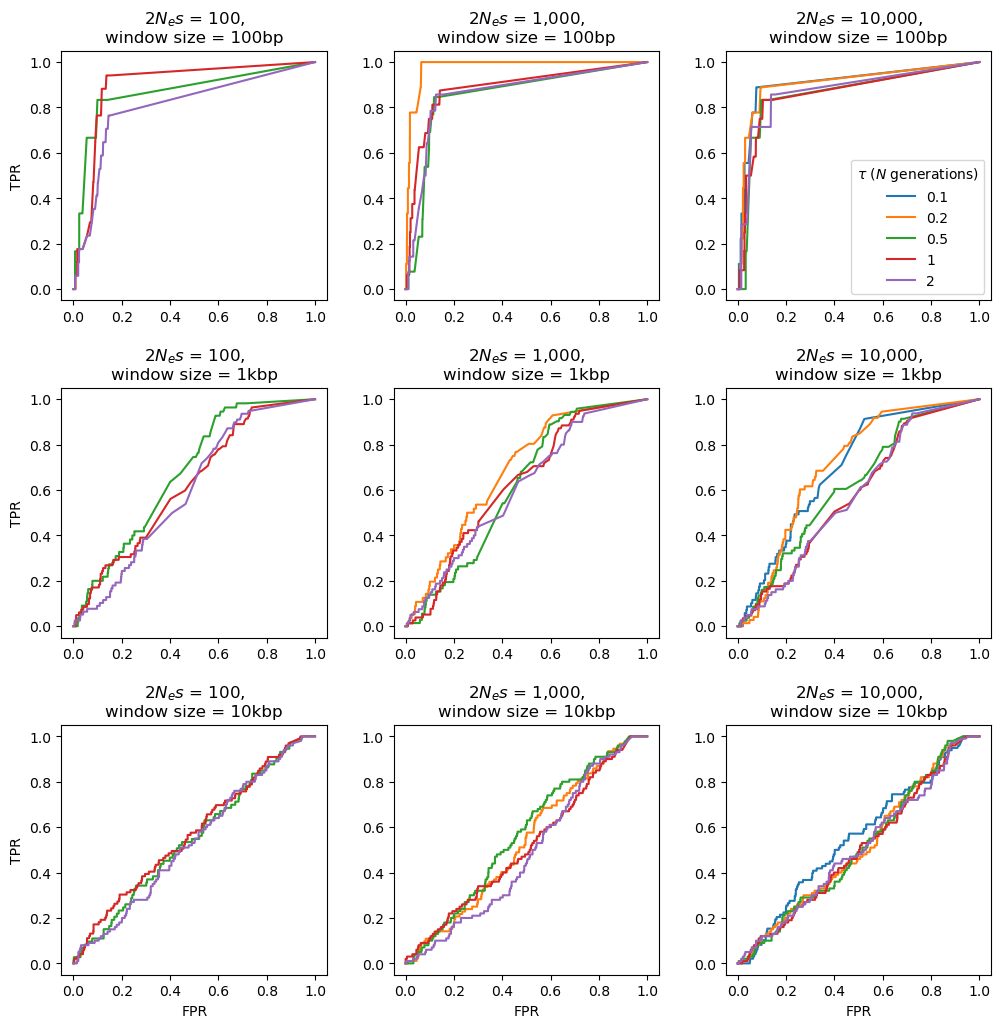

In [22]:
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

labs = ['100bp', '1kbp', '10kbp']

fig, axs = plt.subplots(3, 3, figsize=(12,12))
chr_len=91161

for i, gen in enumerate([0.5, 1, 2]):
    rdf = [pd.DataFrame() for x in range(0, 3)] 
    for rep in range(1, 101):
        for w, winSize in enumerate([100, 1000, 10000]):
            try:
                df = pd.read_csv(r"/home/vivak/aye_aye/sweep_scans/power_analysis/sweeps/scans/output/" + str(gen) + "/100/rep"
                                          + str(rep) + ".clr", sep='\t', header=0)
                df['bin'] = pd.cut(df.location, [x for x in range(1, chr_len+winSize, winSize)],
                                          labels=[x for x in range(1, chr_len, winSize)])
                #sweep at position 37,336
                sweep = ((int(math.ceil(37336 / winSize)) - 1) * winSize) + 1
                df['sweep'] = np.where(df.bin == sweep, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['sweep'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['LR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['LR'] = np.where(df.LR.isna(), 0, df.LR)
                df['sweep'] = np.where(df.sweep > 1, 1, df.sweep)
                rdf[w] = pd.concat([rdf[w], df])
            except Exception:
                pass
    for r, df in enumerate(rdf):
        y = df.sweep
        scores = df.LR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        axs[r,0].plot(fpr, tpr, label=str(gen) + "$N$", c=cols[i+2]) 
        axs[r,0].set_title("$2N_es$" + " = 100,\nwindow size = " + str(labs[r]))
        axs[r,0].set_ylabel("TPR")
    axs[2,0].set_xlabel("FPR")
    
    
for i, gen in enumerate([0.2, 0.5, 1, 2]):
    rdf = [pd.DataFrame() for x in range(0, 3)] 
    for rep in range(1, 101):
        for w, winSize in enumerate([100, 1000, 10000]):
            try:
                df = pd.read_csv(r"/home/vivak/aye_aye/sweep_scans/power_analysis/sweeps/scans/output/" + str(gen) + "/1000/rep"
                                          + str(rep) + ".clr", sep='\t', header=0)
                df['bin'] = pd.cut(df.location, [x for x in range(1, chr_len+winSize, winSize)],
                                          labels=[x for x in range(1, chr_len, winSize)])
                #sweep at position 37,336
                sweep = ((int(math.ceil(37336 / winSize)) - 1) * winSize) + 1
                df['sweep'] = np.where(df.bin == sweep, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['sweep'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['LR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['LR'] = np.where(df.LR.isna(), 0, df.LR)
                df['sweep'] = np.where(df.sweep > 1, 1, df.sweep)
                rdf[w] = pd.concat([rdf[w], df])
            except Exception:
                pass
    for r, df in enumerate(rdf):
        y = df.sweep
        scores = df.LR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        axs[r,1].plot(fpr, tpr, label=str(gen) + "$N$", c=cols[i+1]) 
        axs[r,1].set_title("$2N_es$" + " = 1,000,\nwindow size = " + str(labs[r]))
    axs[2,1].set_xlabel("FPR")
    
for i, gen in enumerate([0.1, 0.2, 0.5, 1, 2]):
    rdf = [pd.DataFrame() for x in range(0, 3)] 
    for rep in range(1, 101):
        for w, winSize in enumerate([100, 1000, 10000]):
            try:
                df = pd.read_csv(r"/home/vivak/aye_aye/sweep_scans/power_analysis/sweeps/scans/output/" + str(gen) + "/10000/rep"
                                          + str(rep) + ".clr", sep='\t', header=0)
                df['bin'] = pd.cut(df.location, [x for x in range(1, chr_len+winSize, winSize)],
                                          labels=[x for x in range(1, chr_len, winSize)])
                #sweep at position 37,336
                sweep = ((int(math.ceil(37336 / winSize)) - 1) * winSize) + 1
                df['sweep'] = np.where(df.bin == sweep, 1, 0)
                df1 = pd.DataFrame(df.groupby('bin')['sweep'].sum())
                df2 = pd.DataFrame(df.groupby('bin')['LR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['LR'] = np.where(df.LR.isna(), 0, df.LR)
                df['sweep'] = np.where(df.sweep > 1, 1, df.sweep)
                rdf[w] = pd.concat([rdf[w], df])
            except Exception:
                pass
    for r, df in enumerate(rdf):
        y = df.sweep
        scores = df.LR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        axs[r,2].plot(fpr, tpr, label=str(gen), c=cols[i]) 
        axs[r,2].set_title("$2N_es$" + " = 10,000,\nwindow size = " + str(labs[r]))
    axs[2,2].set_xlabel("FPR")
        
axs[0,2].legend(title=r'$\tau$' + ' (' + '$N$' +  ' generations)')
plt.subplots_adjust(wspace=0.25, hspace=0.35)

plt.savefig('/home/vivak/aye_aye/sweep_scans/plots/SF2_ROC.png', format='png', bbox_inches='tight')

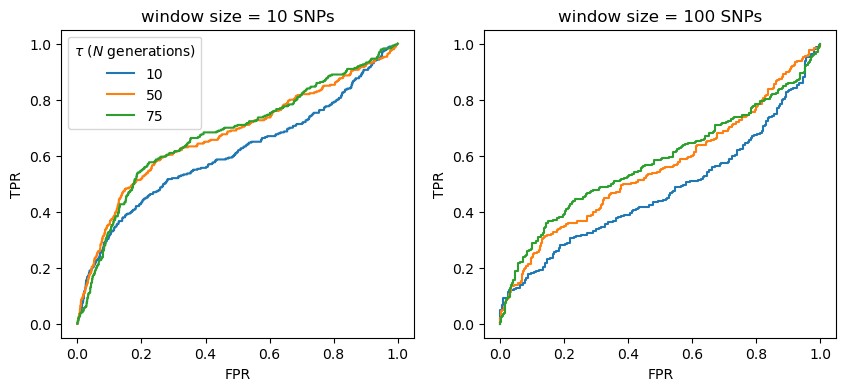

In [23]:
cols = ['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']

labs = ['10 SNPs', '100 SNPs']

fig, axs = plt.subplots(1, 2, figsize=(10,4))
chr_len=91161

for i, gen in enumerate([10, 50, 75]):
    rdf = [pd.DataFrame() for x in range(0, 2)] 
    for rep in range(1, 101):
        for w, winSize in enumerate([10, 100]):
            try:
                df = pd.read_csv(r"/home/vivak/aye_aye/sweep_scans/power_analysis/balancing_selection/scans/output/" + str(gen) + "/rep"
                                              + str(rep) + "_" + str(winSize) + "nt.clr", sep='\t', header=0)
                df2 = pd.read_csv(r"/home/vivak/aye_aye/sweep_scans/power_analysis/balancing_selection/scans/input/" + str(gen) + "/rep"
                                              + str(rep) + ".aff", sep='\t', header=0)
                #Create list of positions from output to use as bins, and add rightmost position
                lst = list(df.physPos)
                lst.append(91161)
                #Create bins and identify which bin bp belongs in 
                df2['bin'] = pd.cut(df2.physPos, lst, labels=lst[:-1])
                bp_bin = int(df2[df2.physPos==37336].bin.iloc[0])
                #Create boolean column for presence/absence of bp
                df['bp'] = np.where(df.physPos == bp_bin, 1, 0)
                #Account for sliding windows by checking windows to left and right
                bp_bin2 = df2.iloc[df2[df2.physPos==37336].index-(winSize/2)].bin.iloc[0]
                df['bp'] = np.where(df.physPos == bp_bin2, 1, df.bp)
                bp_bin3 = df2.iloc[df2[df2.physPos==37336].index+(winSize/2)].bin.iloc[0]
                df['bp'] = np.where(df.physPos == bp_bin3, 1, df.bp)
                df1 = pd.DataFrame(df.groupby('physPos')['bp'].sum())
                df2 = pd.DataFrame(df.groupby('physPos')['CLR'].max())
                df = pd.merge(df1,df2, left_index=True, right_index=True)
                df['CLR'] = np.where(df.CLR.isna(), 0, df.CLR)
                df['bp'] = np.where(df.bp > 1, 1, df.bp)
                
                rdf[w] = pd.concat([rdf[w], df])
            except Exception:
                pass
            
    for r, df in enumerate(rdf):
        y = df.bp
        scores = df.CLR
        fpr, tpr, thresholds = metrics.roc_curve(y, scores)
        axs[r].plot(fpr, tpr, label=str(gen), c=cols[i]) 
        axs[r].set_title("window size = " + str(labs[r]))
        axs[r].set_xlabel("FPR")
        axs[r].set_ylabel("TPR")
axs[0].legend(title=r'$\tau$' + ' (' + '$N$' +  ' generations)')

plt.savefig('/home/vivak/aye_aye/sweep_scans/plots/BM_ROC.png', format='png', bbox_inches='tight')